In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [64]:
df = pd.read_csv('df_clean.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            12711 non-null  uint64 
 1   channelGrouping          12711 non-null  object 
 2   visitNumber              12711 non-null  int64  
 3   visitStartTime           12711 non-null  float64
 4   browser                  12711 non-null  object 
 5   operatingSystem          12711 non-null  object 
 6   isMobile                 12711 non-null  int64  
 7   deviceCategory           12711 non-null  object 
 8   subContinent             12711 non-null  object 
 9   hits                     12711 non-null  int64  
 10  pageviews                12711 non-null  int64  
 11  bounces                  12711 non-null  int64  
 12  newVisits                12711 non-null  int64  
 13  sessionQualityDim        12711 non-null  float64
 14  timeOnSite            

## Get dummies

In [66]:
df = pd.get_dummies(df, columns=['channelGrouping'], prefix=['channel'])
df = pd.get_dummies(df, columns=['browser'], prefix=['browser'])
df = pd.get_dummies(df, columns=['operatingSystem'], prefix=['operatingSystem'])
df = pd.get_dummies(df, columns=['deviceCategory'], prefix=['deviceCategory'])
df = pd.get_dummies(df, columns=['subContinent'], prefix=['subContinent'])
df = pd.get_dummies(df, columns=['source'], prefix=['source'])

In [67]:
X = df.drop(columns='totalTransactionRevenue', axis = 1)
y = df.totalTransactionRevenue

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

## Standardize

In [69]:
#Call the StandardScaler`s fit method
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [70]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectFromModel(RandomForestRegressor(n_estimators=1000), max_features=5)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [71]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
y_pred = model.predict(X_test_fs)

In [72]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  29259351051619.34
MAE:  479291.4233852649
r2 Score:  0.44520191352732685


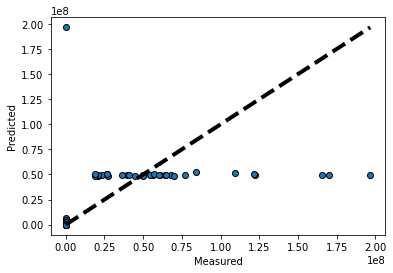

In [73]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Decision Tree

In [74]:
model = DecisionTreeRegressor()

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
               'splitter': ['best', 'random']}

In [75]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='mae', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=300)


In [76]:
y_pred = dt_random.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  21580784976402.727
MAE:  289210.8023072889
r2 Score:  0.59079823102147


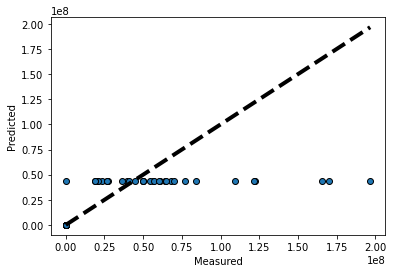

In [78]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [84]:
for i in y_pred:
    print(i, end = ' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

 0.0 0.0 0.0 0.0 0.0 0.0 0.0 43520000.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 43520000.0 43520000.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 43520000.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 43520000.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

## Random Forest Regession

In [85]:
model = RandomForestRegressor()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'mae']}


In [86]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=200, min_samples_leaf=30, min_samples_split=500,
                      n_estimators=45)


In [87]:
y_pred = rf_random.predict(X_test)

In [88]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  19315923139067.688
MAE:  276281.43323936773
r2 Score:  0.6337431689068549


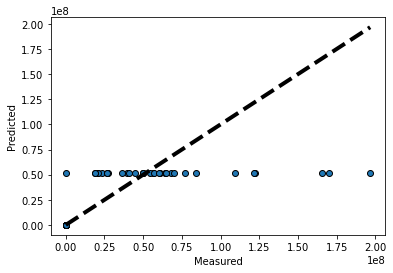

In [89]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [90]:
for i in y_pred:
    print(i, end = ' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

## Gradient Boosting Regession

In [ ]:
model = GradientBoostingRegressor()

parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
               'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['friedman_mse', 'mse', 'mae']}

In [ ]:
gb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", gb_random.best_estimator_)

In [ ]:
y_pred = gb_random.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## MLPRegressor

In [ ]:
model = MLPRegressor(max_iter=100)

parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [ ]:
mlp_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 5, 
                               random_state=42, n_jobs = -1)
mlp_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mlp_random.best_estimator_)

In [ ]:
y_pred = mlp_random.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# PCA

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Decision Tree Regressor With PCA

In [28]:
model = DecisionTreeRegressor()

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
               'splitter': ['best', 'random']}

In [29]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='mae', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=300)


In [30]:
y_pred = dt_random.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  21639693582852.65
MAE:  289723.3875196644
r2 Score:  0.5896812417185449


## Random Forest Regession With PCA

In [32]:
model = RandomForestRegressor()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'mae']}


In [33]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='mae', max_depth=3, min_samples_split=650,
                      n_estimators=40)


In [34]:
y_pred = rf_random.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  22544594828075.84
MAE:  313393.8122705821
r2 Score:  0.5725230525840399


## Gradient Boosting Regession With PCA

In [36]:
model = GradientBoostingRegressor()

parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
               'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['friedman_mse', 'mse', 'mae']}

In [37]:
gb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", gb_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.2, max_depth=15, max_features='auto',
                          min_samples_leaf=25, min_samples_split=3,
                          n_estimators=30)


In [38]:
y_pred = gb_random.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  21138417830531.645
MAE:  366883.50975469325
r2 Score:  0.5991861288123224


## MLPRegressor With PCA

In [40]:
model = MLPRegressor(max_iter=100)

parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [41]:
mlp_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 5, 
                               random_state=42, n_jobs = -1)
mlp_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mlp_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPRegressor(alpha=0.3, hidden_layer_sizes=(50, 100, 50),
             learning_rate='invscaling', max_iter=100)


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
y_pred = mlp_random.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  28689443388330.324
MAE:  471815.21047425637
r2 Score:  0.4560081573329754


## Best Model Selection

The following model performed best:

RandomForestRegressor(max_depth=200, min_samples_leaf=30, min_samples_split=500, n_estimators=45)
                      
MSE:  22544594828075.84

MAE:  313393.8122705821

r2 Score:  0.5725230525840399